In [1]:
import pandas as pd
from statsbombpy import sb

In [2]:
def get_data(match_ids):
    event_data_tot = pd.DataFrame()
    for match_id in match_ids:
        event_data = sb.events(match_id=match_id)
        print(event_data.type.value_counts())
        df_360 = pd.read_json(
            f"/Users/borgwardt/Documents/repos/open-data/data/three-sixty/{match_id}.json"  # noqa: E501
        )
        df_merged = pd.merge(
            event_data, df_360, how="left", left_on="id", right_on="event_uuid"
        )
        event_data_tot = pd.concat(
            [event_data_tot, df_merged], ignore_index=True
        )  # noqa: E501
    return event_data_tot



def preprocess_data(df_raw):
    df_preprocessed = df_raw.sort_values(["match_id","index"])
    df_preprocessed["event_time"]=df_preprocessed.minute.values*60+df_preprocessed.second.values
    df_preprocessed.reset_index(inplace=True)
    return df_preprocessed


def create_kpis(df_match):
    kpi_summary = pd.DataFrame()
    for team in df_match.team.unique():
        other_team = [t for t in df_match.team.unique() if t != team]
        team_events = df_match[df_match.team == team]
        other_team_events = df_match[df_match.team == other_team[0]]

        # Total goals
        goals_scored = team_events[
            team_events["shot_outcome"] == "Goal"
        ].shape[  # noqa: E501
            0
        ]  # noqa: E501
        goals_conceded = other_team_events[
            other_team_events["shot_outcome"] == "Goal"
        ].shape[
            0
        ]  # noqa: E501

        # Total shots
        shots = len(team_events[team_events["type"] == "Shot"])
        # Total xg
        shot_statsbomb_xg_scored = team_events["shot_statsbomb_xg"].sum()
        shot_statsbomb_xg_conceded = other_team_events[
            "shot_statsbomb_xg"
        ].sum()  # noqa: E501
        # Total passes
        passes = len(team_events[team_events["type"] == "Pass"])

        # Pass accuracy
        completed_passes = len(
            team_events[
                (team_events["type"] == "Pass")
                & (team_events["pass_outcome"].isnull())  # noqa: E501
            ]
        )
        pass_accuracy = (completed_passes / passes) * 100

        # Total interceptions
        interceptions = len(team_events[team_events["type"] == "Interception"])

        # Total clearances
        clearances = len(team_events[team_events["type"] == "Clearance"])

        # Percentage of possession
        team_possession_seconds = team_events[
            (team_events["type"] != "Pressure")
        ].duration.sum()
        other_team_possession_seconds = other_team_events[
            (other_team_events["type"] != "Pressure")
        ].duration.sum()

        kpi_summary_temp = pd.DataFrame(
            {
                "goals_scored": [goals_scored],
                "goals_conceded": [goals_conceded],
                "shot_statsbomb_xg_scored": [shot_statsbomb_xg_scored],
                "shot_statsbomb_xg_conceded": [shot_statsbomb_xg_conceded],
                "shots": [shots],
                "passes": [passes],
                "pass_accuracy": [pass_accuracy],
                "interceptions": [interceptions],
                "clearances": [clearances],
                "possession": [
                    team_possession_seconds
                    / (other_team_possession_seconds + team_possession_seconds)
                ],
            },
            index=[team],
        )
        kpi_summary = pd.concat(
            [kpi_summary, kpi_summary_temp], ignore_index=False
        )  # noqa: E501
    return kpi_summary


def color_cells(row):
    cell_color = []
    for val in row:
        if row["high_is_good"] * row["Team Values"] < row["high_is_good"] * (
            row["Average"] - 0.25 * row["STD"]
        ):
            color = "red"
        elif row["high_is_good"] * row["Team Values"] > row["high_is_good"] * (
            row["Average"] + 0.25 * row["STD"]
        ):
            color = "green"
        else:
            color = "orange"
        cell_color.append(f"color: {color}")
    return cell_color

In [3]:
competitions = sb.competitions()
womens_euro_competition = competitions[
    competitions["competition_name"] == "UEFA Women's Euro"
]
womens_euro_2022 = womens_euro_competition[
    womens_euro_competition["season_name"] == "2022"
]
euro_competition_id = womens_euro_2022.competition_id.unique()[0]
euro_season_id = womens_euro_2022.season_id.unique()[0]

/Users/borgwardt/Library/Caches/pypoetry/virtualenvs/euro2022-jflC4-0A-py3.11/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [4]:
match_ids = sb.matches(
        competition_id=euro_competition_id, season_id=euro_season_id
    ).match_id

In [5]:

event_data_tot=pd.DataFrame()
for match_id in match_ids:
    event_data = sb.events(match_id=match_id)
    df_360 = pd.read_json(
        f"/Users/borgwardt/Documents/repos/open-data/data/three-sixty/{match_id}.json"  # noqa: E501
    )
    df_merged = pd.merge(
        event_data, df_360, how="left", left_on="id", right_on="event_uuid"
    )
    event_data_tot = pd.concat(
        [event_data_tot, df_merged], ignore_index=True
    )

/Users/borgwardt/Library/Caches/pypoetry/virtualenvs/euro2022-jflC4-0A-py3.11/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/borgwardt/Library/Caches/pypoetry/virtualenvs/euro2022-jflC4-0A-py3.11/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/borgwardt/Library/Caches/pypoetry/virtualenvs/euro2022-jflC4-0A-py3.11/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/borgwardt/Library/Caches/pypoetry/virtualenvs/euro2022-jflC4-0A-py3.11/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/borgwardt/Library/Caches/pypoetry/virtualenvs/euro2022-jflC4-0A-py3.11/lib/python3.11/site-packages/stats

In [24]:
def get_center_ids(event_data_tot):
    center_back=pd.DataFrame()
    for index, row in event_data_tot.iterrows():

        if isinstance(row.tactics, dict):
            player_temp=[]
            match_id=row.match_id
            team=row.team
            index=row["index"]
            for player in row.tactics["lineup"]:
                if 2<player["position"]["id"]<6:
                    player_temp.append(player["player"]["id"])
            center_back_temp=pd.DataFrame({"match_id":[match_id],"team":[team],"index":[index],"center_id":[player_temp]})
            center_back=pd.concat([center_back,center_back_temp])
    df_center=pd.merge(event_data_tot,center_back,how="left",on=["match_id","index","team"]).sort_values(["match_id","team","index"])
    df_center["center_id"].ffill(inplace=True)
    return df_center

In [25]:
df_center=get_center_ids(event_data_tot)


In [27]:
df_preprocessed = preprocess_data(df_center)

In [28]:
def add_oppnent_team(df_preprocessed):
    grouped_teams=df_preprocessed.groupby("match_id").team.unique()
    teams_df_1 = grouped_teams.apply(pd.Series)

    # Rename the columns
    teams_df_1.columns = ['team_1', 'team_2']

    # Reset the index to have match_id as a column
    teams_df_1.reset_index(inplace=True)
    teams_df_2=teams_df_1.copy()
    teams_df_2.columns=["match_id","team_2","team_1"]
    df_teams=pd.concat([teams_df_2,teams_df_1])
    df_teams.columns=["match_id","team","opponent"]
    df_preprocessed=df_preprocessed.merge(df_teams,how="left",on=["match_id","team"])
    return df_preprocessed


In [29]:
df_preprocessed=add_oppnent_team(df_preprocessed)

In [41]:
def get_time_delta_from_opponent_goal_kick(df_preprocessed):
    # Create a boolean mask to identify rows where the value switches to "From Goal Kick"
    mask = (df_preprocessed['play_pattern'].shift(1) != "From Goal Kick") & (df_preprocessed['play_pattern'] == "From Goal Kick")

    # Get the rows where the mask is True
    result = df_preprocessed[mask]
    df_goal_kick=pd.DataFrame(data={"event_time":result.minute.values*60+result.second.values,"opponent":result.team.values,"match_id":result.match_id.values,"goal_kick_time":result.minute.values*60+result.second.values},index=result.timestamp.index).sort_values(["event_time"])
    df_preprocessed.sort_values("event_time",inplace=True)
    df_preprocessed=pd.merge_asof(df_preprocessed,df_goal_kick,on="event_time",by=['match_id', 'opponent'],direction="backward" )
    df_preprocessed["delta_goal_kick"]=df_preprocessed["event_time"]-df_preprocessed["goal_kick_time"]
    return df_preprocessed
    
def get_center_events_after_opponent_goal_kick(df_preprocessed,tolerance): 
    mask = df_preprocessed.apply(lambda row: row['player_id'] in row['center_id'], axis=1)

    # Get the rows where the mask is True
    df_delta_goal_kick=df_preprocessed[mask][["center_id","player_id","location","delta_goal_kick","team"]] 
    df_result=df_delta_goal_kick[df_delta_goal_kick["delta_goal_kick"]<tolerance]
    df_temp=df_result["location"].apply(pd.Series)
    df_temp.columns=["x","y"]
    df = pd.concat([df_result, df_temp], axis=1)
    return df

In [42]:
df_preprocessed=get_time_delta_from_opponent_goal_kick(df_preprocessed)
df_temp=get_center_events_after_opponent_goal_kick(df_preprocessed,5)

In [47]:
df_temp#.groupby("team")#.x.mean()

,center_id,player_id,location,delta_goal_kick,team,x,y
240,"[10165, 10155]",10155.0,"[36.1, 28.3]",3.0,Spain Women's,36.1,28.3
248,"[10165, 10155]",10155.0,"[36.2, 29.2]",3.0,Spain Women's,36.2,29.2
249,"[10165, 10155]",10155.0,"[36.2, 29.2]",3.0,Spain Women's,36.2,29.2
1575,"[10399, 25491]",10399.0,"[43.0, 61.5]",3.0,Germany Women's,43.0,61.5
1594,"[10399, 25491]",10399.0,"[43.0, 61.5]",3.0,Germany Women's,43.0,61.5
...,...,...,...,...,...,...,...
103897,"[10271, 10125]",10271.0,"[35.1, 58.4]",0.0,France Women's,35.1,58.4
104055,"[10647, 62951]",10647.0,"[29.7, 53.3]",0.0,Netherlands Women's,29.7,53.3
104077,"[10271, 10125]",10125.0,"[25.9, 33.8]",4.0,France Women's,25.9,33.8
104731,"[4642, 18999]",4642.0,"[55.4, 51.2]",3.0,England Women's,55.4,51.2


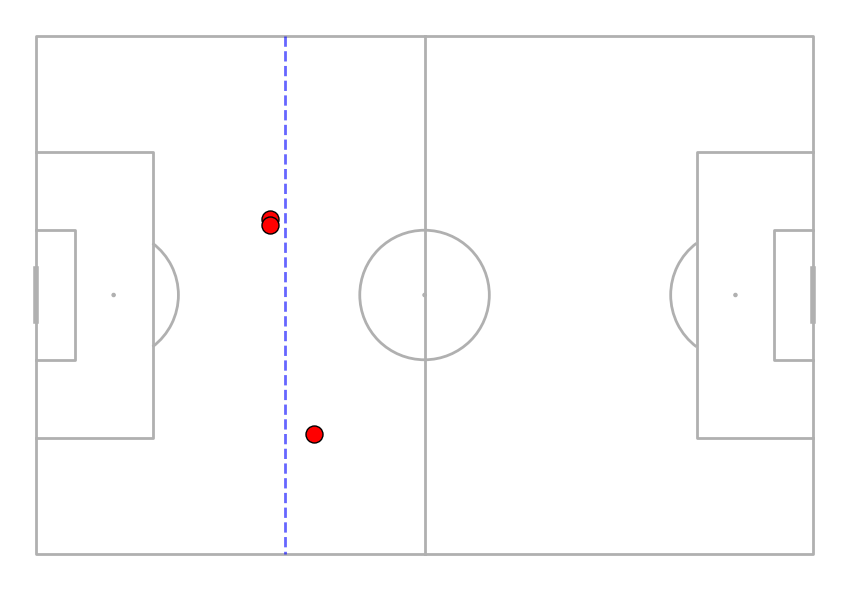

In [63]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# Specify the points
points = [
    (36.1, 28.3),
    (36.2, 29.2),
    (43.0, 61.5)
]

# Separate x and y coordinate lists
x_coords, y_coords = zip(*points)

# Create the figure
fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

# Initialize the pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2)

# Create the pitch plot
pitch.draw(ax=ax)

# Calculate the average y-coordinate
average_coord = sum(x_coords) / len(x_coords)

# Draw horizontal line through the middle of the points
ax.vlines(x=average_coord, ymin=0, ymax=pitch.dim.bottom, color='blue', linestyle='--', linewidth=2, alpha=0.6)

# Plot the points
markers = pitch.scatter(x_coords, y_coords, s=150, color='red', edgecolors="black", zorder=3, ax=ax)

# Show the plot
plt.show()

In [65]:
from opponent_analysis.preprocessing import Preprocessing

In [66]:
from opponent_analysis.preprocessing import Preprocessing